# <div align="center"><b> TRABAJO FINAL - ANÁLISIS DE SERIES TEMPORALES - MIA </b></div>

<div align="right">📝 <em><small><font color='Gray'>Nota:</font></small></em></div>

<div align="right"> <em><small><font color='Gray'> La funcionalidad de visualización de jupyter notebooks en <a href="https://github.com/" target="_blank">github</a> es solamente un preview.</font></small></em> </div>

<div align="right"> <em><small><font color='Gray'> Para mejor visualización se sugiere utilizar el visualizador recomndado por la comunidad: <a href="https://nbviewer.org/" target="_blank">nbviewer</a></font></small></em> </div>

<div align="right"> <em><small><font color='Gray'> Puedes a acceder al sigiente enlace para ver este notebook en dicha página: <a href="https://nbviewer.org/github/brunomaso1/uba-mia/blob/mia-ast1/mia-ast1/Trabajo%20final/tp-final.ipynb">Trabajo final</a></font></small></em> </div>

* * *

<style>
/* Limitar la altura de las celdas de salida en html */
.jp-OutputArea.jp-Cell-outputArea {
    max-height: 500px;
}
</style>

🛻 <em><font color='MediumSeaGreen'>  Instalaciones: </font></em> 🛻

In [3]:
%pip install python-dotenv
%pip install python-binance

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


✋ <em><font color='DodgerBlue'>Importaciones:</font></em> ✋

In [4]:
import os, datetime
from wand.image import Image as WImage
from dotenv import load_dotenv
from binance.client import Client
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

🔧 <em><font color='tomato'>Configuraciones:</font></em> 🔧


In [5]:
load_dotenv()

BINANCE_API_KEY = os.getenv("BINANCE_API_KEY")
BINANCE_API_SECRET = os.getenv("BINANCE_API_SECRET")


BASE_FOLDER_PATH = os.getcwd() # Trabajo Final
DATASET_FOLDER_PATH = os.path.join(BASE_FOLDER_PATH, "datasets") # Trabajo Final/dataset
DATASET_FILE_PATH = os.path.join(DATASET_FOLDER_PATH, "BTCUSDT_1D.csv") # Trabajo Final/dataset/BTCUSDT_1D.csv

<!-- Colab -->
<!-- <div align="center"><img src="https://drive.google.com/uc?export=view&id=1QSNrTsz1hQbmZwpgwx0qpfpNtLW19Orm" width="600" alt="Figura 1: A data scientist is working on word generation using the Lord of the Rings lore. The image is dark and moody, with a focus on the scientist's computer screen. The screen displays a visualization the one ring, with a map of Middle Earth in the background. - Generada con DALL-E3"></div> -->

<div align="center"><img src="../resources/portada.jpeg" width="600" alt="Figura 1: A data scientist is sitting in front of a computer screen, intently focused on the task at hand. The room is dimly lit, with the only light coming from the computer screen. The scientist is predicting the prices of Bitcoin using a statistical model, like ARIMA. - Generada con Microsoft Image Creator"></div>

<div align="center"><small><em>Figura 1: Imagen generada con Microsoft Image Creator</em></small></div>

<div align="center">✨Datos del proyecto:✨</div>

<p></p>

<div align="center">

| Subtitulo       | Trabajo final - Análisis de series temporales 1 - FIUBA                                                                                |
| --------------- | -------------------------------------------------------------------------------------------------------------------------------------- |
| **Descrpción**  | Bitcoin $\leftrightarrow$ USDT                                                                                                                         |
| **Integrantes** | - Bruno Masoller (brunomaso1@gmail.com)<br/>- Juan Cruz Ferreyra (ferreyra.juancruz95@gmail.com)<br/>- Francisco Rassi (franciscorassi@gmail.com)                                                                                                  |

</div>

<details>
    <summary><u>Tabla de contenido</u></summary>

- [Consigna](#consigna)
- [Resolución](#resolución)
    - [Contexto](#contexto)
    - [Objetivos específicos](#objetivos-específicos)
    - [Carga de datos](#carga-de-datos)
    - [Análisis de datos](#análisis-de-datos)
    - [Modelos de series temporales](#modelos-de-series-temporales)
    - [Conclusiones](#conclusiones)
    - [Mejoras futuras](#mejoras-futuras)

</details>

## Consinga <a class="anchor" id="consigna"></a>

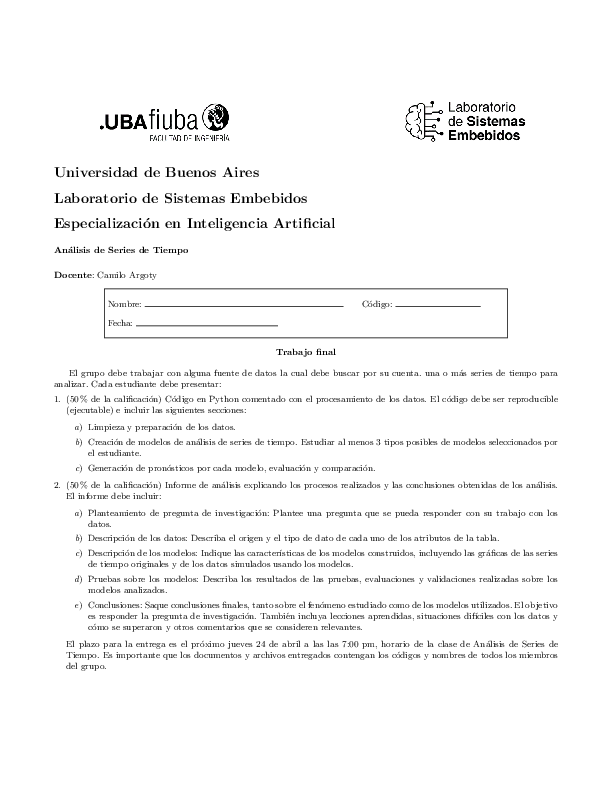

In [6]:
WImage(filename='TP_final_AST_01MA2025.pdf')

## Resolución <a class="anchor" id="resolución"></a>

### Contexto <a class="anchor" id="contexto"></a>

[Binance](https://binance.com) es una plataforma de intercambio de criptomonedas que permite a los usuarios comprar, vender e intercambiar una variedad de criptomonedas. Fundada en 2017, Binance se ha convertido en uno de los intercambios más grandes y populares del mundo, ofreciendo una amplia gama de servicios relacionados con criptomonedas, incluyendo comercio al contado, comercio de futuros, préstamos y ahorros en criptomonedas, y más.

Como parte de su oferta, Binance proporciona una API (Interfaz de Programación de Aplicaciones) que permite a los desarrolladores acceder a datos de mercado, realizar operaciones y gestionar cuentas programáticamente. Esta API es ampliamente utilizada por traders algorítmicos, desarrolladores de aplicaciones y otros interesados en el ecosistema de criptomonedas.

El objetivo general de este trabajo es analizar el comportamiento de los precios de las criptomonedas a través de la API de Binance. Se utilizará datos históricos de precios para realizar un análisis exploratorio y aplicar técnicas de análisis de series temporales. A lo largo del trabajo, abordaremos los siguientes puntos:
- Descripción de la API de Binance y su funcionalidad.
- Planteo de objetivos específicos desafiantes.
- Obtención de datos históricos de precios de criptomonedas a través de la API.
- Análisis exploratorio de los datos obtenidos.
- Aplicación de técnicas de análisis de series temporales para modelar y predecir el comportamiento de los precios.
- Discusión de los resultados y conclusiones.
- Recomendaciones para futuros trabajos y mejoras en el análisis.

<details>
  <summary>Conocimientos básicos</summary>

**API Binance**

La API pública de Binance ofrece un conjunto completo de datos de mercado históricos para todos los símbolos soportados, organizados en archivos diarios y mensuales, cubriendo tanto Spot como los dos tipos de Futuros (USDⓈ-margined y COIN-margined). Estos datos incluyen operaciones agregadas (`aggTrades`), operaciones individuales (`trades`) y velas OHLCV (`klines`).

Se puede acceder a la API de Binance a través de su documentación oficial, que proporciona información detallada sobre cómo utilizarla y qué datos están disponibles: https://developers.binance.com/docs/binance-spot-api-docs/rest-api/general-api-information

Sin embargo, para comunicarse con la API de Binance, es necesario tener una cuenta en Binance y generar una clave API (key y secret).

Por otro lado, Binance ya compila los datos históricos de precios en archivos CSV, lo que facilita el acceso a los datos sin necesidad de utilizar la API. Estos archivos CSV están disponibles en el siguiente enlace: https://data.binance.vision/

Este recompliado de datos incluye la misma información que la API, pero no es necesario tener una API key para acceder a ellos. Los archivos CSV están organizados por símbolo y tipo de mercado (Spot, USDⓈ-margined y COIN-margined), lo que facilita la búsqueda y descarga de los datos deseados. Se puede obtener más información en el repositorio oficial de Binance en GitHub:
https://github.com/binance/binance-public-data?tab=readme-ov-file

Por ejemplo, si se quiere obtener los datos por día (agregados mensualmente) de BTCUSDT en el mercado Spot, se puede acceder a la siguiente URL: https://data.binance.vision/?prefix=data/spot/monthly/klines/BTCUSDT/1d/. Esto proporcionará una lista de archivos CSV que contienen los datos de precios diarios de BTCUSDT en el mercado Spot, organizados por mes.

> 📝 <em><font color='Gray'>Nota:</font></em> En el repositorio se puede obtener el mismo recompilado que se descarga con la API en la carpeta *datasets*.

**Simbolos**

Los símbolos son pares de criptomonedas que se pueden intercambiar entre sí. Por ejemplo, el símbolo `BTCUSDT` representa el intercambio de Bitcoin (BTC) por Tether (USDT). Binance soporta una amplia variedad de símbolos, lo que permite a los usuarios intercambiar diferentes criptomonedas entre sí.

> 📝 <em><font color='Gray'>Nota:</font></em> 
> Se puede consultar la lista completa de símbolos disponibles en Binance a través de su API o en su sitio web. La API proporciona un endpoint específico para obtener información sobre los símbolos y sus características, como el precio mínimo, el precio máximo, el tamaño mínimo de la orden, entre otros.
> La lista de símbolos se puede obtener a través de la siguiente URL: https://api.binance.com/api/v3/exchangeInfo. Esta API devuelve un objeto JSON que contiene información sobre todos los símbolos disponibles en Binance, incluyendo su estado, límites de precios y tamaños de órdenes. Esto no requiere una API key.

> 💡 <em><font color='IndianRed'>Tip:</font></em> 
> Utilizando el cliente, se pueden filtrar los símbolos activos:
> ```python
>   client = Client(api_key, api_secret)
>   exchange_info = client.get_exchange_info()
>   for s in exchange_info['symbols']:
>       print(s['symbol'])
> ```

**Mercados disponibles**

*SPOT*
El mercado Spot es el mercado donde se compran y venden activos financieros para entrega inmediata. En el contexto de criptomonedas, esto significa que los usuarios pueden comprar o vender criptomonedas al precio actual del mercado y recibir la criptomoneda de inmediato. En Binance, el mercado Spot permite a los usuarios intercambiar una amplia variedad de criptomonedas entre sí.

*FUTURES*

Binance Futures son contratos derivados que especulan sobre el precio de un activo en una fecha futura. Hay dos tipos principales:
- USDⓈ-margined Futures: denominados y liquidados en stablecoins (USDT o USDC), con ganancias y pérdidas calculadas en esas monedas 
- COIN-margined Futures: denominados y liquidados en la criptomoneda subyacente, ideales para HODLers y uso de la propia criptomoneda como margen 


**Tipos de datos**

Dentro de cada mercado (Spot, USDⓈ-margined y COIN-margined), Binance expone tres flujos/datasets principales:

- aggTrades: datos de operaciones agregadas por precio y lado (taker/maker) en intervalos muy cortos (100 ms), que reducen redundancias y facilitan el análisis de volúmenes 
- trades: operaciones individuales recientes —hasta 1.000 por solicitud en Spot y hasta 500 en Futures— con detalles de cada fill: precio, cantidad, timestamp, y flags como isBuyerMaker 
- klines: Velas OHLCV (Open, High, Low, Close, Volume) en intervalos configurables (1s, 1m, 3m, 5m, 15m, 30m, 1h, 2h, 4h, 6h, 8h, 12h, 1d, 3d, 1w, 1mo)

</details>

### Objetivo específicos <a class="anchor" id="objetivos-específicos"></a>

Como objetivos específicos, que comprenden la consigna del trabajo, se plantean los siguientes desafíos:

1. Uno de los principales desafíos en en mundo critpo es obtener predicciones fiables y precisas sobre el comportamiento de los precios de las criptomonedas. BTCUSDT es el par más negociado en Binance, por lo que un análisis interesante sería responder la pregunta de como se ha comportado el dolar frente al Bitcoin y si es posible predecir su comportamiento a futuro.
2. Un segundo desafío interesante el concepto de volumen de operaciones. El volumen de operaciones es un indicador clave en el análisis técnico y puede proporcionar información valiosa sobre la actividad del mercado. Usualmente si el volumen de operaciones es alto, significa que hay un gran interés en el activo y puede ser un indicador de que el precio se moverá en una dirección determinada. En contraste, un bajo volumen de operaciones puede indicar que el interés en el activo es bajo y que el precio puede ser más volátil. Una pregunta interesante sería si el volumen de operaciones puede predecir el comportamiento del precio de BTCUSDT.

### Carga de datos <a class="anchor" id="carga-de-datos"></a>

> ⚠️ <em><font color='gold'>Advertencia:</font></em> Si estás ejecutando este cuaderno, asegúrate de cargar las variables de entorno necesarias para acceder a la API de Binance, esto implica tener un archivo `.env` con las variables `BINANCE_API_KEY` y `BINANCE_API_SECRET` definidas.

> 📝 <em><font color='Gray'>Nota:</font></em> Si no tienes una API key, no es necesario para este cuaderno. Una vez descargado el dataset, se lo guarda en un formato que se puede recuperar con todas sus características. Simplemente puedes saltear las siguientes celdas hasta *Análisis de datos* en la ejecución.

In [7]:
# Creamos el cliente de Binance
binance_client = Client(api_key=BINANCE_API_KEY, api_secret=BINANCE_API_SECRET)

# Cargamos los datos de la API de Binance
symbol = "BTCUSDT"
# format (year, month, day, hour, minute, second)
start_time = datetime.datetime(2024, 3, 1, 0, 0, 0)
end_time = datetime.datetime(2025, 3, 31, 0, 0, 0)
klines = binance_client.get_historical_klines(
    symbol=symbol,
    interval=Client.KLINE_INTERVAL_1DAY,  # 1 day interval
    start_str=str(start_time),
    end_str=str(end_time),
)

# Convertimos los datos a un DataFrame de pandas
df = pd.DataFrame(
    klines,
    columns=[
        "Open Time",
        "Open",
        "High",
        "Low",
        "Close",
        "Volume",
        "Close Time",
        "Quote Asset Volume",
        "Number of Trades",
        "Taker Buy Base Asset Volume",
        "Taker Buy Quote Asset Volume",
        "Ignore",
    ],
)

print(f"Cantidad de filas: {len(df)}")
df.head()  # Mostramos las primeras filas del DataFrame

Cantidad de filas: 396


,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Ignore
0,1709251200000,61130.99000000,63114.23000000,60777.00000000,62387.90000000,47737.93473000,1709337599999,2956537377.96602980,1947444,24195.70252000,1498771144.09995600,0
1,1709337600000,62387.90000000,62433.19000000,61561.12000000,61987.28000000,25534.73659000,1709423999999,1582566973.83409310,1641808,12691.37721000,786583052.08627260,0
2,1709424000000,61987.28000000,63231.88000000,61320.00000000,63113.97000000,28994.90903000,1709510399999,1804536272.94434580,1992011,14905.18600000,927868983.73084310,0
3,1709510400000,63113.97000000,68499.00000000,62300.00000000,68245.71000000,84835.16005000,1709596799999,5568877537.08125230,3887853,45319.08640000,2974396037.68572030,0
4,1709596800000,68245.71000000,69000.00000000,59005.00000000,63724.01000000,132696.78130000,1709683199999,8674526591.28714170,5310706,65991.84526000,4318205559.64365010,0


In [8]:
# Guardamos el DataFrame en un archivo pickle
df.to_csv(DATASET_FILE_PATH, index=False)

### Análisis de datos <a class="anchor" id="análisis-de-datos"></a>

In [9]:
# Cargamos el conjunto de datos
df = pd.read_csv(DATASET_FILE_PATH)

#### Tipos de datos

De la documentación de la API de [Binance](https://github.com/binance/binance-public-data?tab=readme-ov-file#klines), se sabe que las columnas del conjunto de datos son las siguientes:
- `Open time` $\rightarrow$ Timestamp de apertura de la vela (en milisegundos)
- `Open` $\rightarrow$ Precio de apertura de la vela
- `High` $\rightarrow$ Precio máximo de la vela
- `Low` $\rightarrow$ Precio mínimo de la vela
- `Close` $\rightarrow$ Precio de cierre de la vela
- `Volume` $\rightarrow$ Volumen de operaciones durante la vela
- `Close time` $\rightarrow$ Timestamp de cierre de la vela (en milisegundos)
- `Quote asset volume` $\rightarrow$ Volumen de operaciones en la moneda base (en USDT)
- `Number of trades` $\rightarrow$ Número de operaciones realizadas durante la vela
- `Taker buy base asset volume` $\rightarrow$ Volumen de operaciones en la moneda base (en USDT) compradas por el lado del comprador
- `Taker buy quote asset volume` $\rightarrow$ Volumen de operaciones en la moneda base (en USDT) compradas por el lado del vendedor
- `Ignore` $\rightarrow$ Si ignora el campo, se puede dejar vacío

Se aplica la siguiente conversión de tipos de datos:

In [10]:
# Definimos los tipos de datos para las columnas
columns_to_convert = {
    "Open Time": "datetime64[ms]",
    "Close Time": "datetime64[ms]",
    "Open": float,
    "High": float,
    "Low": float,
    "Close": float,
    "Volume": float,
    "Quote Asset Volume": float,
    "Taker Buy Base Asset Volume": float,
    "Taker Buy Quote Asset Volume": float,
    "Number of Trades": int,
}

# Apply type conversions
for column, dtype in columns_to_convert.items():
    df[column] = df[column].astype(dtype)

df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Ignore
0,2024-03-01,61130.99,63114.23,60777.00,62387.90,47737.93473,2024-03-01 23:59:59.999,2.956537e+09,1947444,24195.70252,1.498771e+09,0
1,2024-03-02,62387.90,62433.19,61561.12,61987.28,25534.73659,2024-03-02 23:59:59.999,1.582567e+09,1641808,12691.37721,7.865831e+08,0
2,2024-03-03,61987.28,63231.88,61320.00,63113.97,28994.90903,2024-03-03 23:59:59.999,1.804536e+09,1992011,14905.18600,9.278690e+08,0
3,2024-03-04,63113.97,68499.00,62300.00,68245.71,84835.16005,2024-03-04 23:59:59.999,5.568878e+09,3887853,45319.08640,2.974396e+09,0
4,2024-03-05,68245.71,69000.00,59005.00,63724.01,132696.78130,2024-03-05 23:59:59.999,8.674527e+09,5310706,65991.84526,4.318206e+09,0


#### Información básica

Utilizamos la función `info()` para obtener información básica sobre el conjunto de datos, como el número de filas y columnas, los tipos de datos y la cantidad de valores no nulos en cada columna. Esto nos ayuda a comprender la estructura del conjunto de datos y a identificar cualquier problema potencial con los datos.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Open Time                     396 non-null    datetime64[ms]
 1   Open                          396 non-null    float64       
 2   High                          396 non-null    float64       
 3   Low                           396 non-null    float64       
 4   Close                         396 non-null    float64       
 5   Volume                        396 non-null    float64       
 6   Close Time                    396 non-null    datetime64[ms]
 7   Quote Asset Volume            396 non-null    float64       
 8   Number of Trades              396 non-null    int64         
 9   Taker Buy Base Asset Volume   396 non-null    float64       
 10  Taker Buy Quote Asset Volume  396 non-null    float64       
 11  Ignore                        39

Podemos observar que no hay elementos nulos. También se puede utilizar la función `isnull().sum()` para verificar si hay valores nulos en el conjunto de datos.

In [ ]:
cant_nulos = df.isnull().sum()
print(f"Cantidad de datos nulos:\n{cant_nulos}")

Finalmente, mostramos las estadísticas descriptivas del conjunto de datos utilizando la función `describe()`. Esto nos proporciona información sobre la distribución de los datos, como la media, la desviación estándar, los valores mínimo y máximo, y los percentiles. Esto es útil para comprender mejor el comportamiento de los precios y el volumen de operaciones en el conjunto de datos.

In [34]:
df.describe()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Ignore
count,396,396.000000,396.000000,396.000000,396.000000,396.000000,396,3.960000e+02,3.960000e+02,396.000000,3.960000e+02,396.0
mean,2024-09-14 12:00:00,75130.871667,76660.888384,73510.109293,75184.959520,32429.972411,2024-09-15 11:59:59.999000,2.428852e+09,3.322309e+06,15938.662369,1.193337e+09,0.0
min,2024-03-01 00:00:00,53962.970000,54850.000000,49000.000000,53962.970000,5420.221140,2024-03-01 23:59:59.999000,4.562354e+08,5.628320e+05,2284.191780,1.922910e+08,0.0
25%,2024-06-07 18:00:00,63161.887500,64464.245000,61804.452500,63192.085000,19830.229000,2024-06-08 17:59:59.999000,1.444602e+09,1.562842e+06,9642.221350,6.903443e+08,0.0
50%,2024-09-14 12:00:00,68247.795000,69500.000000,66837.835000,68256.935000,27921.300355,2024-09-15 11:59:59.999000,2.016132e+09,2.546511e+06,13793.797980,9.736778e+08,0.0
75%,2024-12-22 06:00:00,91162.280000,94033.247500,89286.742500,91162.272500,39982.410077,2024-12-23 05:59:59.999000,2.967016e+09,4.265081e+06,19865.147165,1.447411e+09,0.0
max,2025-03-31 00:00:00,106143.820000,109588.000000,105321.490000,106143.820000,162065.591860,2025-03-31 23:59:59.999000,1.104800e+10,1.201236e+07,77363.263230,5.657171e+09,0.0
std,NaN,15343.870506,15612.707655,15029.769726,15332.134304,20288.615124,NaN,1.599045e+09,2.386543e+06,10101.220495,7.982296e+08,0.0


Mirando rápidamente podemos ver que tenemos valores coherentes, sin embargo, también podemos hacer un chequeo de outliers:

<Axes: >

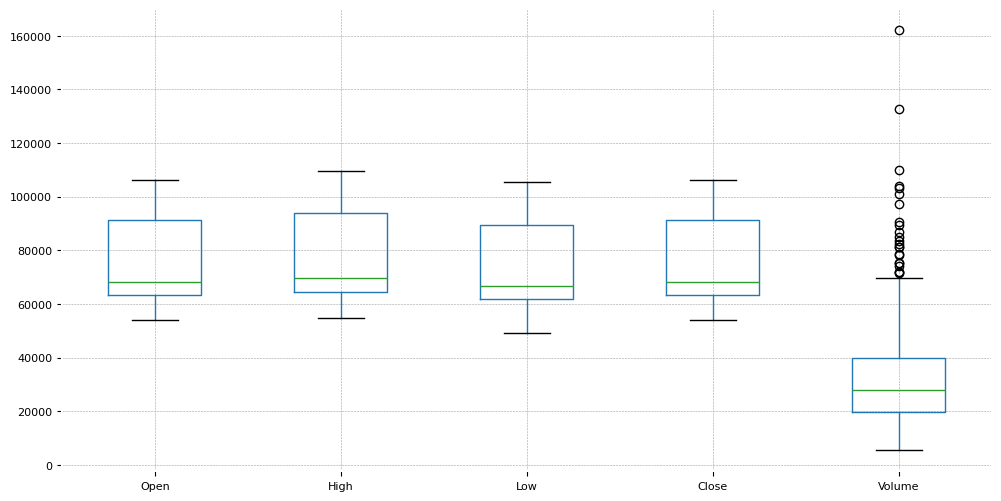

In [42]:
# Chequear outliers
df.boxplot(column=["Open", "High", "Low", "Close", "Volume"], figsize=(12, 6))

> 📝 <em><font color='Gray'>Nota:</font></em> Se puede aplicar un filtro para eliminar los outliers. Esto se puede hacer utilizando el método `quantile()` para calcular los percentiles 0.01 y 0.99 y luego filtrando los datos para mantener solo aquellos que están dentro de este rango. Sin embargo, no queremos "gaps" en la serie (ya que habría que ver una política de imputación de datos), por lo que se trabajará con esta información.

#### Visualización rápida

Se utiliza la librería `mplfinance` para graficar y obtener una rápida visión de los datos. La función `plot_candlestick` permite visualizar las velas OHLCV (Open, High, Low, Close, Volume) de los precios a lo largo del tiempo:

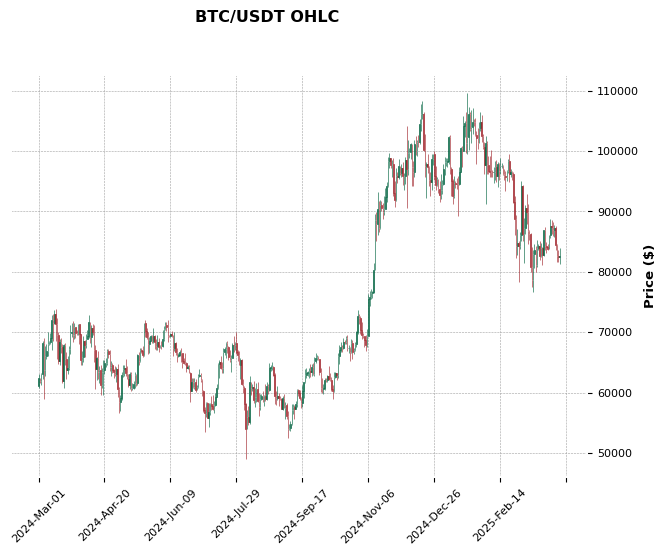

In [11]:
df_ohlc = df[["Open Time", "Open", "High", "Low", "Close"]].copy()
df_ohlc.set_index('Open Time', inplace=True)

# Definimos el estilo del gráfico
style = mpf.make_mpf_style(base_mpf_style="charles", rc={"font.size": 8})

# Creamos el gráfico de velas
mpf.plot(df_ohlc, type="candle", style=style, title="BTC/USDT OHLC", ylabel="Price ($)")

#### Gráficos sobre las variables

Podemos realizar gráficos simples sobre variables como precio de cierre o volumen de operaciones. A continuación, se presentan algunos ejemplos de gráficos que pueden ser útiles para analizar el comportamiento de los precios y el volumen de operaciones a lo largo del tiempo:

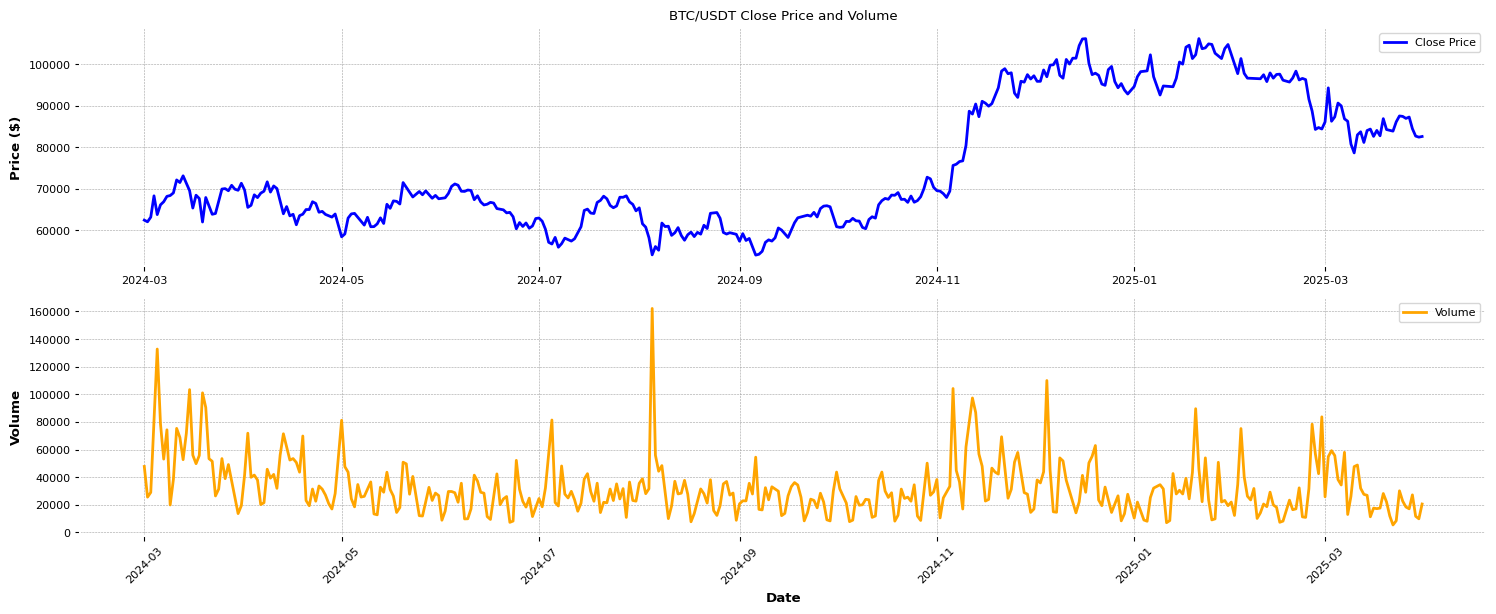

In [ ]:
# Graficamos ambos precios y volumen en un solo gráfico
plt.figure(figsize=(15, 6))
plt.subplot(2, 1, 1)
plt.plot(df["Open Time"], df["Close"], label="Close Price", color="blue")
plt.title("BTC/USDT Close Price and Volume")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df["Open Time"], df["Volume"], label="Volume", color="orange")
plt.ylabel("Volume")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.xlabel("Date")

plt.show()

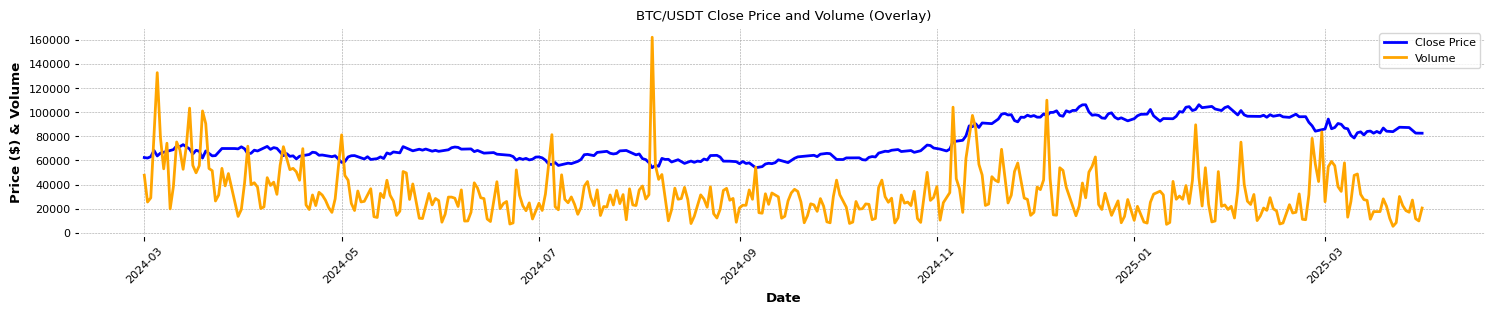

In [27]:
# Graficamos uno sobre el otro
plt.figure(figsize=(15, 3))
plt.plot(df["Open Time"], df["Close"], label="Close Price", color="blue")
plt.plot(df["Open Time"], df["Volume"], label="Volume", color="orange")
plt.title("BTC/USDT Close Price and Volume (Overlay)")
plt.ylabel("Price ($) & Volume")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.xlabel("Date")

plt.show()

En los gráficos anteriores podemos observar que el volumen se mantiene casi constante a lo largo del tiempo, mientras que el precio de cierre presenta una tendencia creciente. Esto sugiere que, a pesar de la estabilidad en el volumen de operaciones, el precio de BTCUSDT ha estado aumentando en el período analizado. En un principio, no parece haber una relación directa entre el volumen de operaciones y el precio de cierre, ya que los picos de volumen no siempre coinciden con picos en el precio en el período analizado. Sin embargo, se puede observar que desde el 11-2024 el volumen se ha vuelto más volátil y el precio a aumentado.

#### Pruebas de estacionaridad

Temas:
- Prueba Dickey-Fuller
- Descomposición ETS

### Modelos de series temporales <a class="anchor" id="modelos-de-series-temporales"></a>

#### Modelo 1

Temas:
- Modelos autorregresivos y media movil (AR, MA, ARIMA, SARIMA, SARIMAX)

#### Modelo 2

Temas:
- Libería autoarrima y prophet

#### Modelo 3

Temas:
- LSTM y algún otro?

### Conclusiones <a class="anchor" id="conclusiones"></a>

Temas:
- Resumen de resultados obtenidos
- Respuesta a las preguntas planteadas
- Aprendizajes

### Mejoras futuras <a class="anchor" id="mejoras-futuras"></a>